In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
field = 'IDARADO2'

## Upload WCA file


In [3]:
df1 = pd.read_csv('/home/dasxgo/developer/rock/WCA_2.csv')
data_major = 'OIL'
data_reservoir = 'WCA'
df1.insert(0, 'FIELD', field) 
df1.insert(1, 'MAJOR', data_major)
df1.insert(2, 'RESERVOIR', data_reservoir)
df1.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-05-01,1,31,369,256,521
1,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-06-01,2,30,9046,7205,13550
2,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-07-01,3,31,8277,9401,12466
3,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-08-01,4,31,8645,10927,13092
4,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-09-01,5,30,7093,10786,10800


## Upload WCB file

In [4]:
df2 = pd.read_csv('/home/dasxgo/developer/rock/WCB_2.csv')
data_major = 'OIL'
data_reservoir = 'WCB'
df2.insert(0, 'FIELD', field) 
df2.insert(1, 'MAJOR', data_major)
df2.insert(2, 'RESERVOIR', data_reservoir)
df2.head()


,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-05-01,1,31,2960,2731,6107
1,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-06-01,2,30,22900,20793,47279
2,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-07-01,3,31,23100,25215,47742
3,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-08-01,4,31,15346,23772,31752
4,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-09-01,5,30,12285,27857,25446


## Upload LSS file

In [5]:
df3 = pd.read_csv('/home/dasxgo/developer/rock/LSS_2.csv')
data_major = 'OIL'
data_reservoir = 'LSS'
df3.insert(0, 'FIELD', field) 
df3.insert(1, 'MAJOR', data_major)
df3.insert(2, 'RESERVOIR', data_reservoir)
df3.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-06-01,1,30,31329,8505,75909
1,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-07-01,2,31,22055,18004,53596
2,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-08-01,3,31,18680,11996,45531
3,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-09-01,4,30,17455,9466,42671
4,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-10-01,5,31,26144,16693,64099


## **Flatflie**

In [6]:
df = pd.concat([df1,df2,df3], ignore_index=True)
df['ProducingMonth'] = pd.to_datetime(df['ProducingMonth'])
df.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-05-01,1,31,369,256,521
1,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-06-01,2,30,9046,7205,13550
2,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-07-01,3,31,8277,9401,12466
3,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-08-01,4,31,8645,10927,13092
4,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-09-01,5,30,7093,10786,10800


## Data according to plan



In [7]:
def calculate_production_values(df, well_planned):
    production_columns = ['LiquidsProd_BBL', 'GasProd_MCF', 'WaterProd_BBL']
    production_data = {}

    for column in production_columns:
        data = df[column] * (well_planned / df['LateralLength_FT']) * (30.4 / df['ProducingDays'])
        production_data[column] = data

    df[['OIL_BBL', 'GAS_MCF', 'WATER_BBL']] = pd.DataFrame(production_data)

    # Convert columns to int64
    for column in production_columns:
        df[['OIL_BBL', 'GAS_MCF', 'WATER_BBL']] = np.array(df[['OIL_BBL', 'GAS_MCF', 'WATER_BBL']], np.int64)

    return df

well_planned = 5000
df = calculate_production_values(df, well_planned)
df.head()


/home/dasxgo/mambaforge/envs/rock/lib/python3.11/site-packages/pandas/core/generic.py:2070: RuntimeWarning: invalid value encountered in cast
  return np.asarray(self._values, dtype=dtype)


,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL,OIL_BBL,GAS_MCF,WATER_BBL
0,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-05-01,1,31,369,256,521,242,168,342
1,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-06-01,2,30,9046,7205,13550,6152,4900,9215
2,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-07-01,3,31,8277,9401,12466,5447,6187,8204
3,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-08-01,4,31,8645,10927,13092,5689,7191,8616
4,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-09-01,5,30,7093,10786,10800,4823,7335,7344


## Type of Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FIELD             4810 non-null   object        
 1   MAJOR             4810 non-null   object        
 2   RESERVOIR         4810 non-null   object        
 3   API_UWI           4810 non-null   object        
 4   TVD_FT            4810 non-null   int64         
 5   LateralLength_FT  4810 non-null   int64         
 6   ENVOperator       4810 non-null   object        
 7   WellName          4810 non-null   object        
 8   ProducingMonth    4810 non-null   datetime64[ns]
 9   TotalProdMonths   4810 non-null   int64         
 10  ProducingDays     4810 non-null   int64         
 11  LiquidsProd_BBL   4810 non-null   int64         
 12  GasProd_MCF       4810 non-null   int64         
 13  WaterProd_BBL     4810 non-null   int64         
 14  OIL_BBL           4810 n

## Check errors


In [9]:
## variable = OIL_BBL, GAS_MCF or WATER_BBL

error = 'OIL_BBL'

df[df[error] == 0].count() + df[df[error] < 0].count() 


FIELD               41
MAJOR               41
RESERVOIR           41
API_UWI             41
TVD_FT              41
LateralLength_FT    41
ENVOperator         41
WellName            41
ProducingMonth      41
TotalProdMonths     41
ProducingDays       41
LiquidsProd_BBL     41
GasProd_MCF         41
WaterProd_BBL       41
OIL_BBL             41
GAS_MCF             41
WATER_BBL           41
dtype: int64

## Cleanning Data


In [10]:
cols = ["OIL_BBL", "GAS_MCF", "WATER_BBL"]
for col in cols:
    
    df.drop(df[(df["OIL_BBL"] == 0) | (df["OIL_BBL"] < 0)].index, inplace = True)
    df.drop(df[(df["GAS_MCF"] == 0) | (df["GAS_MCF"] < 0)].index, inplace = True)
    df.drop(df[(df["WATER_BBL"] == 0) | (df["WATER_BBL"] < 0)].index, inplace = True)

## Check cleanning

In [11]:
## variable = OIL_BBL, GAS_MCF or WATER_BBL

data_okay = 'OIL_BBL'

df[df[data_okay ] == 0].count() + df[df[data_okay] < 0].count()

FIELD               0
MAJOR               0
RESERVOIR           0
API_UWI             0
TVD_FT              0
LateralLength_FT    0
ENVOperator         0
WellName            0
ProducingMonth      0
TotalProdMonths     0
ProducingDays       0
LiquidsProd_BBL     0
GasProd_MCF         0
WaterProd_BBL       0
OIL_BBL             0
GAS_MCF             0
WATER_BBL           0
dtype: int64

## **Check Flaflie**

In [12]:
df.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL,OIL_BBL,GAS_MCF,WATER_BBL
0,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-05-01,1,31,369,256,521,242,168,342
1,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-06-01,2,30,9046,7205,13550,6152,4900,9215
2,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-07-01,3,31,8277,9401,12466,5447,6187,8204
3,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-08-01,4,31,8645,10927,13092,5689,7191,8616
4,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-09-01,5,30,7093,10786,10800,4823,7335,7344


In [13]:
def select_data_frame(df, reservoir):
    df_reservoir = df[df['RESERVOIR'] == reservoir]
    return df_reservoir[['WellName', 'TotalProdMonths', 'OIL_BBL']]

# funtion for the reservoir
df_lss = select_data_frame(df, "LSS")
df_wsb = select_data_frame(df, "WCB")
df_wca = select_data_frame(df, "WCA")


In [14]:
df_lss

,WellName,TotalProdMonths,OIL_BBL
3184,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,1,15226
3185,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2,10373
3186,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,3,8785
3187,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,4,8483
3188,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,5,12296
...,...,...,...
4805,TEXACO-MCMURRY 3244B 2HL,4,7581
4806,TEXACO-MCMURRY 3244B 2HL,5,6520
4807,DIRE WOLF UNIT 2 0427SH,1,3626
4808,DIRE WOLF UNIT 2 0427SH,2,6844


In [15]:
# Maximum 

df_lss['OIL_BBL'].max()

23555

In [16]:
# Remplace maximum

df_lss.loc[df_lss["TotalProdMonths"] <= 1, 'OIL_BBL'] =  23555.000000
df_lss

,WellName,TotalProdMonths,OIL_BBL
3184,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,1,23555
3185,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2,10373
3186,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,3,8785
3187,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,4,8483
3188,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,5,12296
...,...,...,...
4805,TEXACO-MCMURRY 3244B 2HL,4,7581
4806,TEXACO-MCMURRY 3244B 2HL,5,6520
4807,DIRE WOLF UNIT 2 0427SH,1,23555
4808,DIRE WOLF UNIT 2 0427SH,2,6844


In [17]:
# Remplace Month

df_lss.loc[df_lss["TotalProdMonths"] <= 1, 'TotalProdMonths'] =  0
df_lss

,WellName,TotalProdMonths,OIL_BBL
3184,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,0,23555
3185,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2,10373
3186,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,3,8785
3187,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,4,8483
3188,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,5,12296
...,...,...,...
4805,TEXACO-MCMURRY 3244B 2HL,4,7581
4806,TEXACO-MCMURRY 3244B 2HL,5,6520
4807,DIRE WOLF UNIT 2 0427SH,0,23555
4808,DIRE WOLF UNIT 2 0427SH,2,6844


## Oil Average curve Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


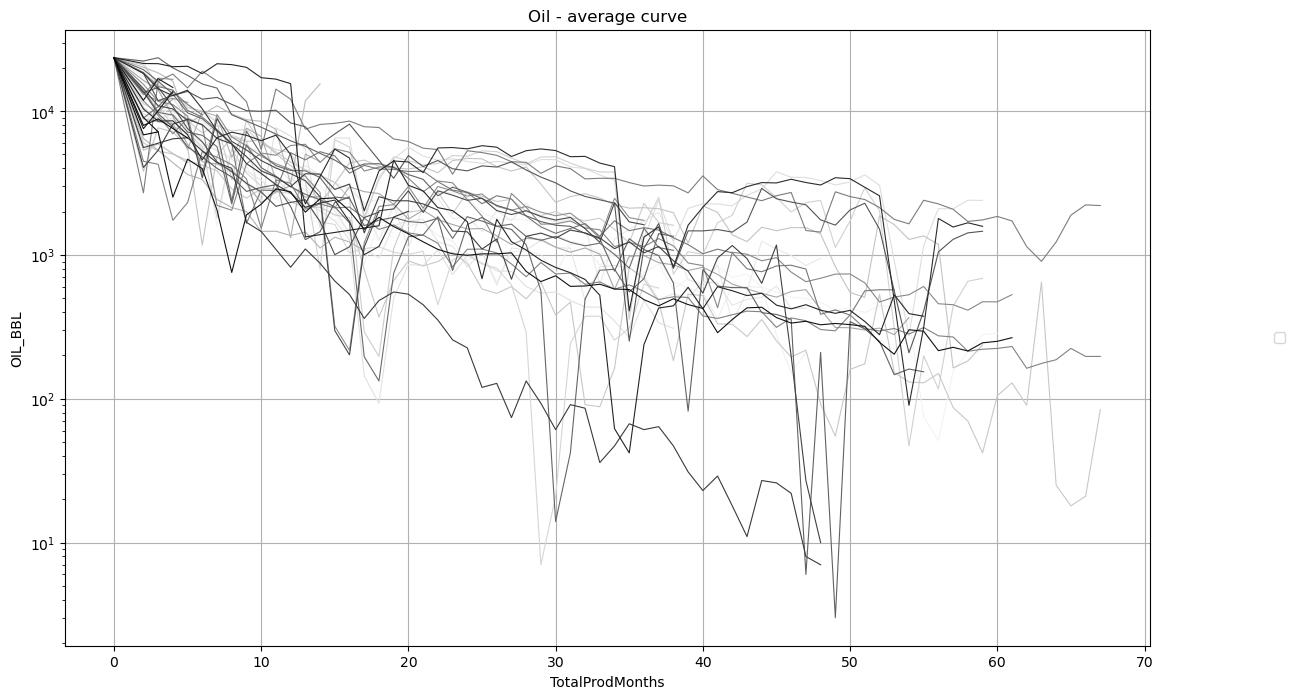

In [55]:
def plot_oil_average_curve(data, x, y):
    plt.figure(figsize=(14,8))
    plt.yscale('log')
    plt.title("Oil - average curve")
    plt.xlabel("TotalProdMonths")
    plt.ylabel("OIL_BBL")
    plt.legend(loc='center', bbox_to_anchor=(1.12,0.5))
    plt.grid(visible=True, which='major', axis='both')
    sns.lineplot(data=data1, x=x, y=y, hue="WellName", palette='Greys', 
    estimator=None, n_boot=1000, lw=0.8, orient='x', sort=True, legend=None, ci='deprecated', ax=None)
    plt.show()

# Example of use of the function
data1 = df_lss
x = 'TotalProdMonths'
y = "OIL_BBL"
plot_oil_average_curve(data, x, y)

In [20]:
df_lss.groupby('TotalProdMonths').count()

,WellName,OIL_BBL
TotalProdMonths,,
0,48,48
2,48,48
3,47,47
4,47,47
5,42,42
...,...,...
63,3,3
64,3,3
65,3,3


In [32]:
df_x = df_lss.groupby('TotalProdMonths').mean()
df_x

/tmp/ipykernel_509/292866415.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_x = df_lss.groupby('TotalProdMonths').mean()


,OIL_BBL
TotalProdMonths,
0,23555.000000
2,12062.770833
3,11323.234043
4,10244.617021
5,8675.095238
...,...
63,575.666667
64,481.333333
65,711.000000


In [33]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 67
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OIL_BBL  67 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_509/2979034135.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data2, x=x, y=y, hue=None, palette='Greys',


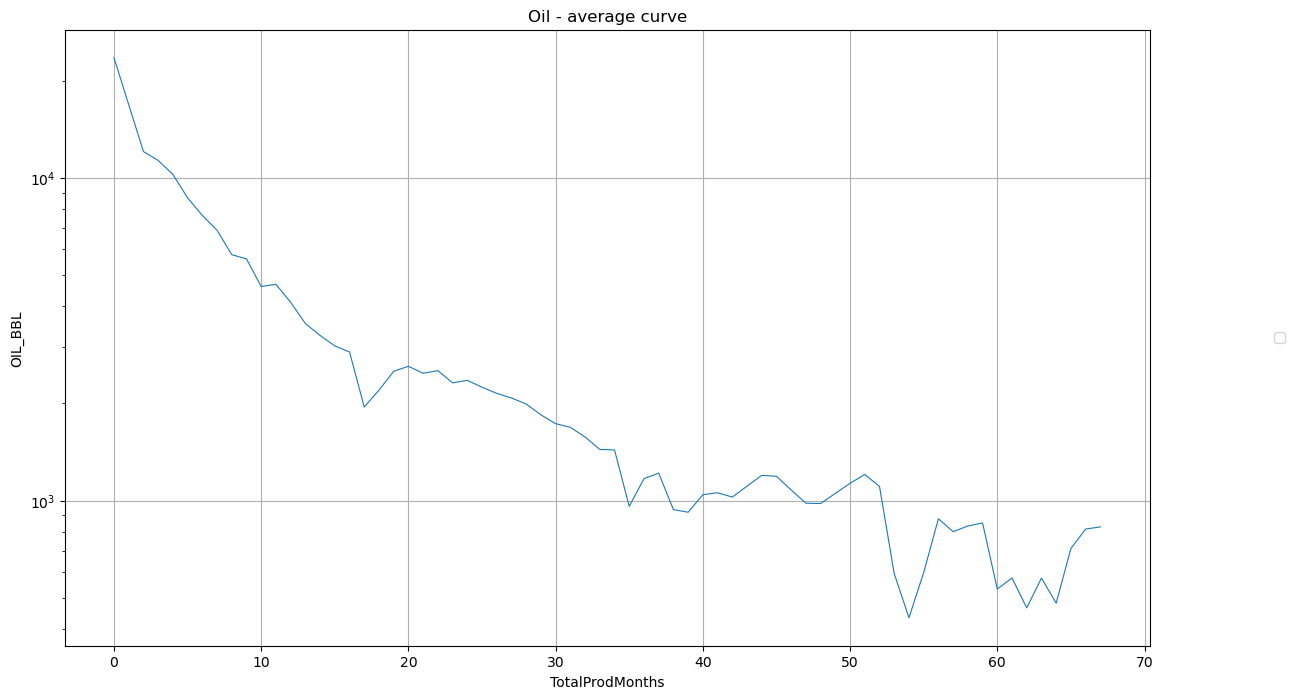

In [54]:
def plot_oil_average_curve(data, x, y):
    plt.figure(figsize=(14,8))
    plt.yscale('log')
    plt.title("Oil - average curve")
    plt.xlabel("TotalProdMonths")
    plt.ylabel("OIL_BBL")
    plt.legend(loc='center', bbox_to_anchor=(1.12,0.5))
    plt.grid(visible=True, which='major', axis='both')
    sns.lineplot(data=data2, x=x, y=y, hue=None, palette='Greys', 
    estimator=None, n_boot=1000, lw=0.8, orient='x', sort=True, legend=None, ci='deprecated', ax=None)
    plt.show()

# Example of use of the function
data2 = df_x
x = 'TotalProdMonths'
y = "OIL_BBL"
plot_oil_average_curve(data2, x, y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_509/980617179.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data2, x=x, y=y, hue=None, palette='Greys',


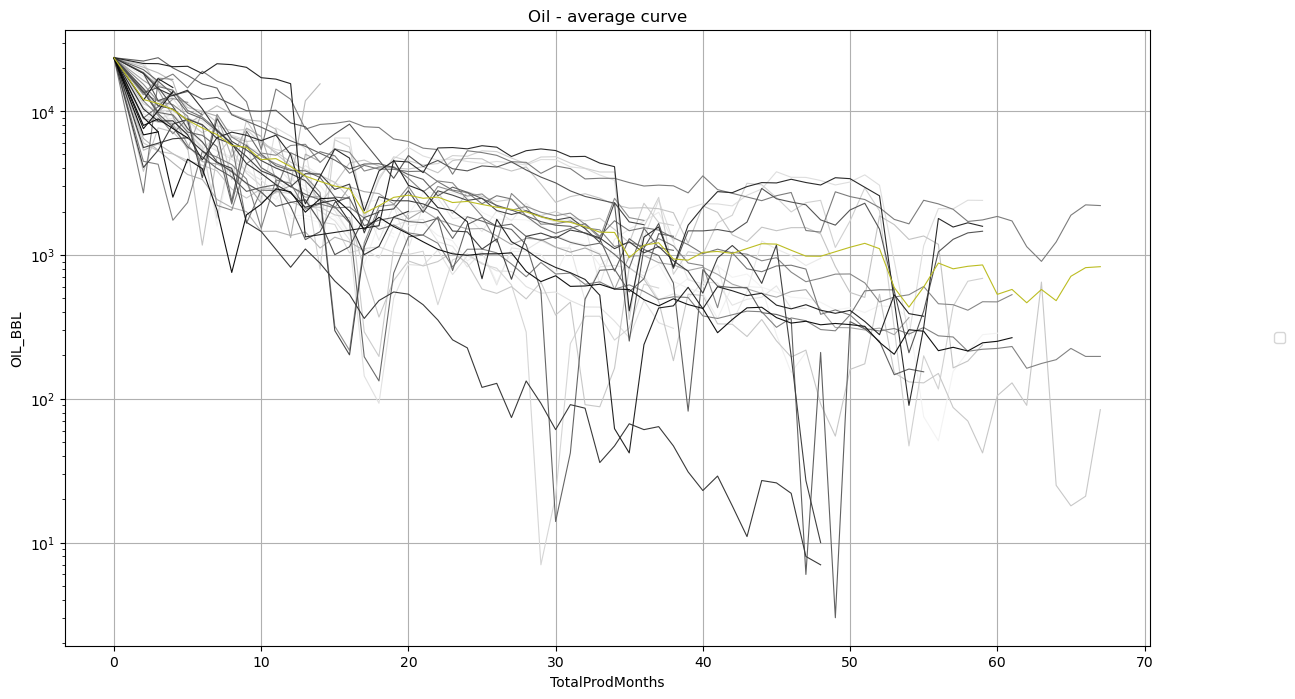

In [65]:
def plot_oil_average_curve(data1, data2, x, y):
    fig, axs = plt.subplots(1, 1, figsize=(14, 8))
    plt.yscale('log')
    plt.title("Oil - average curve")
    plt.xlabel("TotalProdMonths")
    plt.ylabel("OIL_BBL")
    plt.legend(loc='center', bbox_to_anchor=(1.12,0.5))
    plt.grid(visible=True, which='major', axis='both')

    sns.lineplot(data=data1, x=x, y=y, hue="WellName", palette='Greys', 
    estimator=None, n_boot=1000, lw=0.8, orient='x', sort=True, legend=None, ci='deprecated', ax=None)

    sns.lineplot(data=data2, x=x, y=y, hue=None, palette='Greys', 
    estimator=None, n_boot=1000, lw=0.8, orient='x', sort=True, legend=None, ci='deprecated', ax=None)

    plt.show() 

# Example of use of the function
data1 = df_lss
data2 = df_x
x = 'TotalProdMonths'
y = "OIL_BBL"
plot_oil_average_curve(data1, data2, x, y)


